In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_original=pd.read_excel("superstore_sales.xlsx")

In [3]:
data_original.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
data_original.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
data_original.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [7]:
data_original.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
data_original.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
profit,51290.0,28.641740,174.424113,-6599.978,0.000000,9.240,36.8100,8399.976
shipping_cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570
year,51290.0,2012.777208,1.098931,2011.000,2012.000000,2013.000,2014.0000,2014.000


what is oversales trend

In [9]:
data_original["order_date"].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
data_original["order_date"].max()

Timestamp('2014-12-31 00:00:00')

In [13]:
data_original["month-year"]=data_original["order_date"].apply(lambda x:x.strftime('%Y-%m'))

In [14]:
data_original["month-year"]

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month-year, Length: 51290, dtype: object

In [16]:
data_temp = data_original.groupby("month-year").sum()['sales'].reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15988\937618552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = data_original.groupby("month-year").sum()['sales'].reset_index()


In [17]:
data_temp 

,month-year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


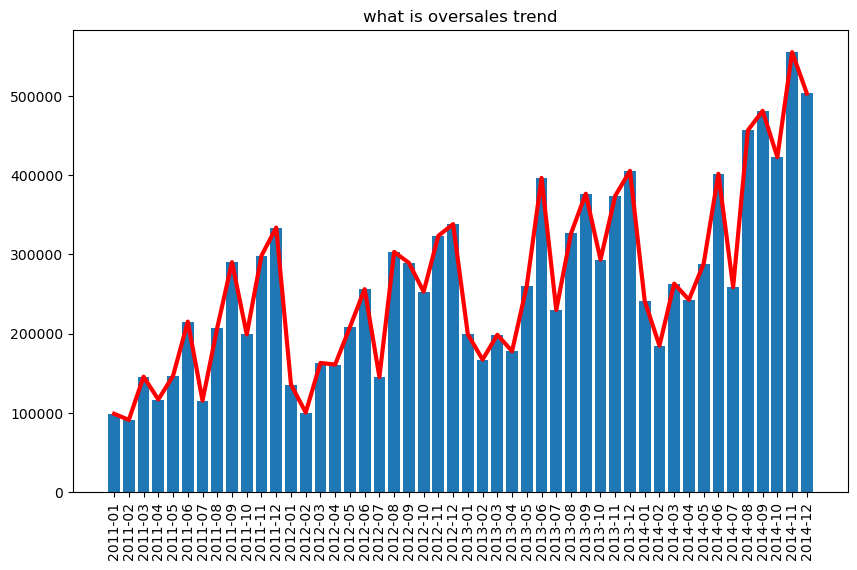

In [25]:
plt.figure(figsize=(10,6))
plt.bar(data_temp["month-year"],data_temp["sales"])
plt.xticks(rotation="vertical")
plt.title("what is oversales trend")
plt.plot(data_temp["month-year"],data_temp["sales"],color="red",linewidth=3)
plt.show()

Which products most selled

In [27]:
prod_sales=data_original.groupby('product_name').sum()['sales']

C:\Users\Admin\AppData\Local\Temp\ipykernel_15988\648417062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales=data_original.groupby('product_name').sum()['sales']


In [29]:
prod_sales=pd.DataFrame(prod_sales)

In [42]:
prod_sales_top_10=prod_sales.sort_values(by="sales",ascending=False).head(10)

In [43]:
prod_sales_top_10

,sales
product_name,
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",2706.080
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",176.288
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.688
#10 Self-Seal White Envelopes,108.682
#6 3/4 Gummed Flap White Envelopes,71.280
"1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",49.980
"#10 Gummed Flap White Envelopes, 100/Box",41.300


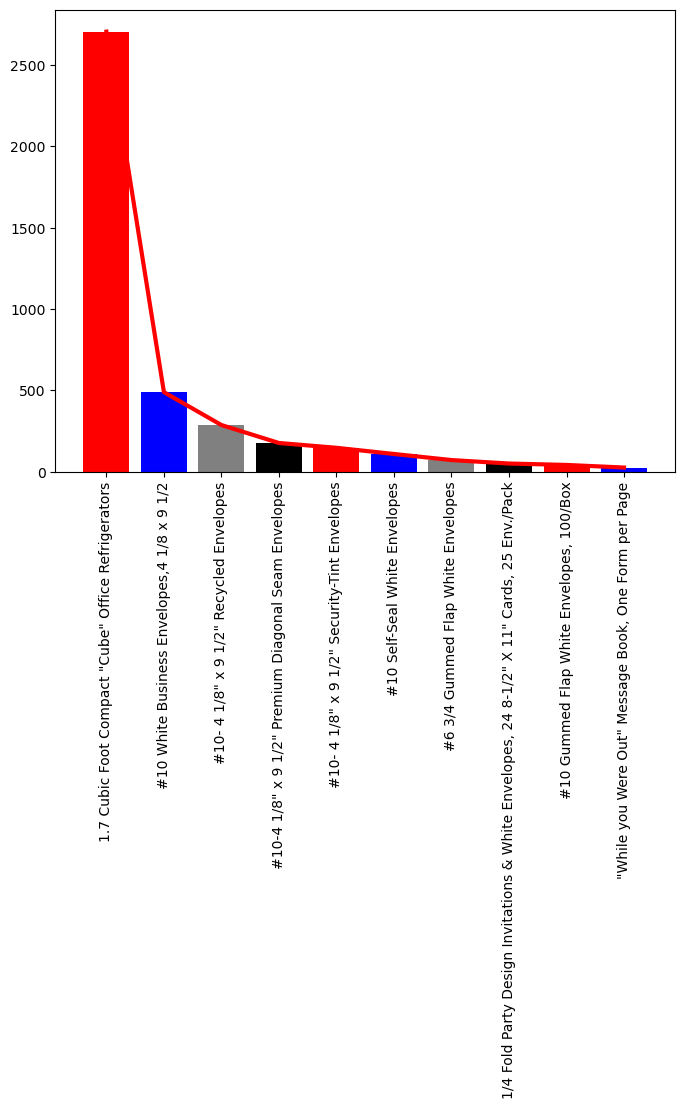

In [47]:
plt.figure(figsize=(8,6))
plt.bar(prod_sales_top_10.index,prod_sales_top_10["sales"],color=["red","blue","gray","black"])
plt.plot(prod_sales_top_10.index,prod_sales_top_10["sales"],color="red",linewidth=3)
plt.xticks(rotation="vertical")
plt.show()

WHICH ARE THE MOST SELLING PRODUCTS?

In [52]:
best_selling_prods = pd.DataFrame(data_original.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by='quantity', inplace=True, ascending=False)

# Most selling products
best_selling_prods_top_10=best_selling_prods.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15988\1917673780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_selling_prods = pd.DataFrame(data_original.groupby('product_name').sum()['quantity'])


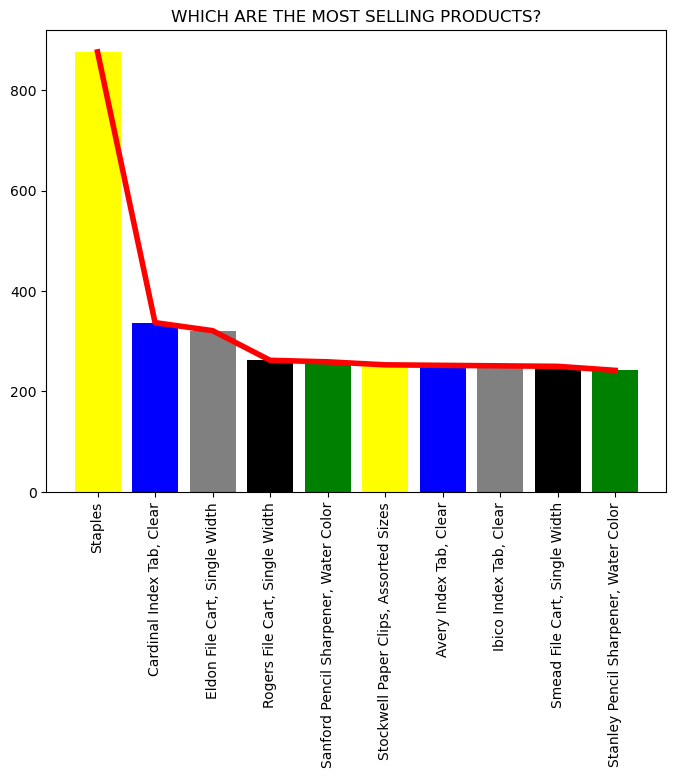

In [57]:
plt.figure(figsize=(8,6))
plt.bar(best_selling_prods_top_10.index,best_selling_prods_top_10['quantity'],color=["yellow","blue","gray","black","green"])
plt.plot(best_selling_prods_top_10.index,best_selling_prods_top_10['quantity'],color="red",linewidth=4)
plt.xticks(rotation="vertical")
plt.title("WHICH ARE THE MOST SELLING PRODUCTS?")
plt.show()

WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [58]:
cat_subcat = pd.DataFrame(data_original.groupby(['category', 'sub_category']).sum()['profit'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_15988\3023257291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_subcat = pd.DataFrame(data_original.groupby(['category', 'sub_category']).sum()['profit'])


In [60]:

cat_subcat=cat_subcat.sort_values(['category','profit'], ascending=False)

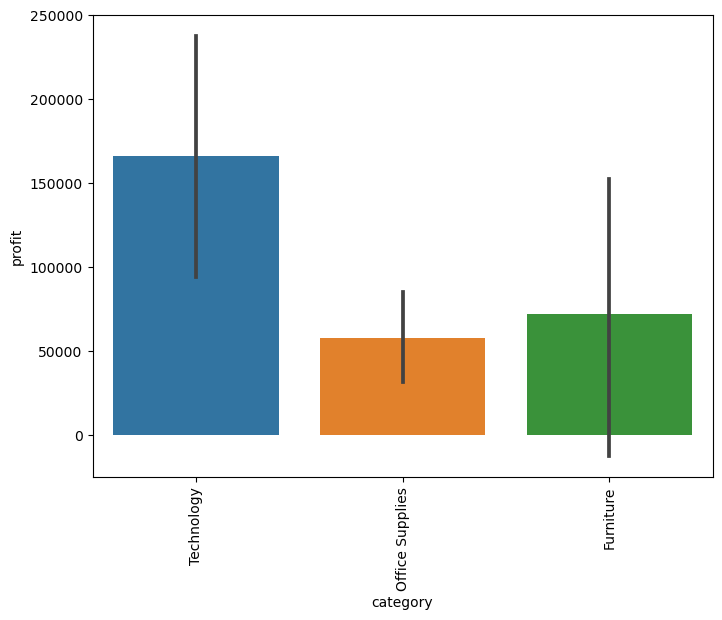

In [72]:
plt.figure(figsize=(8,6))
plt.xticks(rotation="vertical")
sns.barplot(x=cat_subcat.index.get_level_values(0),y=cat_subcat["profit"])
plt.title("WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?")
plt.show()